In [3]:
from prophet import Prophet
import yfinance as yf
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

stock_ticker = 'NVDA'
yfin = yf.Ticker(stock_ticker)
hist = yfin.history(period="10y")
hist = hist[hist.index.dayofweek < 5]

# Data preprocessing

hist = hist[['Close']]
hist.reset_index(level=0, inplace=True)
hist = hist.rename({'Date': 'ds', 'Close': 'y'}, axis='columns')
hist['ds'] = hist['ds'].dt.tz_localize(None)
hist['ds'] = pd.to_datetime(hist['ds'])

15:27:00 - cmdstanpy - INFO - Chain [1] start processing
15:27:01 - cmdstanpy - INFO - Chain [1] done processing


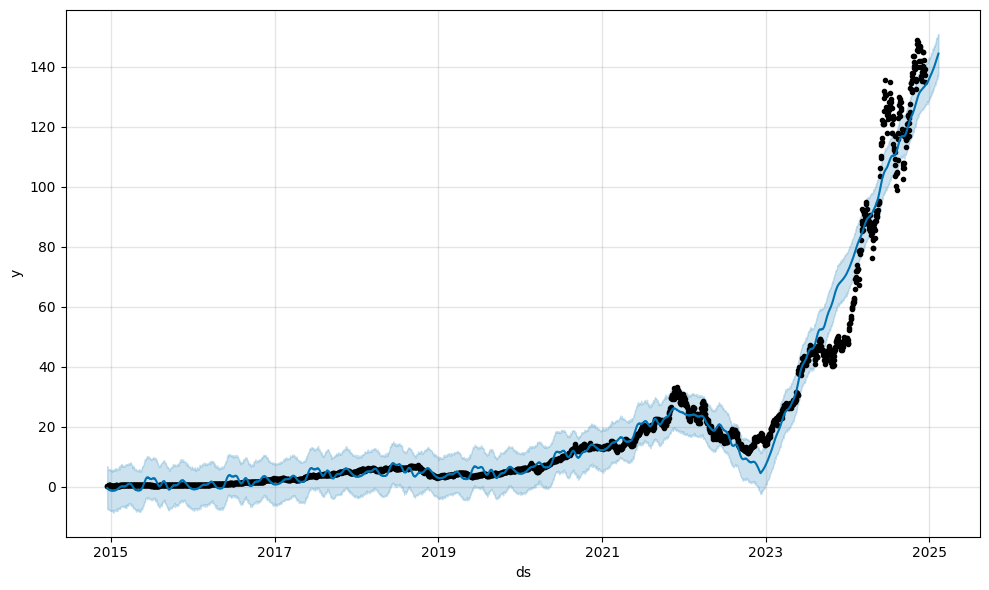

In [7]:
#Prediction
m = Prophet(daily_seasonality=True)
m.fit(hist)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)  
fig1 = m.plot(forecast)

In [6]:
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Perform cross-validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

  0%|          | 0/15 [00:00<?, ?it/s]15:16:50 - cmdstanpy - INFO - Chain [1] start processing
15:16:50 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 1/15 [00:00<00:07,  1.83it/s]15:16:51 - cmdstanpy - INFO - Chain [1] start processing
15:16:51 - cmdstanpy - INFO - Chain [1] done processing
 13%|█▎        | 2/15 [00:01<00:08,  1.57it/s]15:16:51 - cmdstanpy - INFO - Chain [1] start processing
15:16:52 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 3/15 [00:01<00:07,  1.57it/s]15:16:52 - cmdstanpy - INFO - Chain [1] start processing
15:16:52 - cmdstanpy - INFO - Chain [1] done processing
 27%|██▋       | 4/15 [00:02<00:06,  1.60it/s]15:16:53 - cmdstanpy - INFO - Chain [1] start processing
15:16:53 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 5/15 [00:03<00:06,  1.49it/s]15:16:53 - cmdstanpy - INFO - Chain [1] start processing
15:16:53 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 6/15 [00:03<00:05,  1.55it/s]15:16:54

Mean Absolute Error: 10.98
Mean Squared Error: 469.75
Root Mean Squared Error: 21.67
